In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_columns', None)

from google.colab import drive
drive.mount('/content/drive')

data_path = '/content/drive/MyDrive/aedm_municipality_data_new.xlsx'

df = pd.read_excel(data_path)

df


,Year,Municipality_Code,Municipality,Number_guest_nights,Population,Foreign_born_people,Average_Age,Number_of_Companies,GRDP,Disposable_income,Hospitality_Employment,Total_Employment,Percentage_Share,urban&rural
0,2010,0114 Upplands Väsby,Upplands Väsby,NaN,39289,9166,39.2,1633.0,NaN,184,1005,14625,6.871795,Storstadskommuner
1,2010,0115 Vallentuna,Vallentuna,NaN,30114,3420,37.5,1621.0,NaN,192,356,8091,4.399951,Täta kommuner
2,2010,0117 Österåker,Österåker,76440.0,39521,4806,38.9,2292.0,NaN,210,660,9778,6.749847,Storstadskommuner
3,2010,0120 Värmdö,Värmdö,172379.0,38301,4208,37.9,2334.0,NaN,216,955,10666,8.953685,Täta kommuner
4,2010,0123 Järfälla,Järfälla,NaN,66211,15338,39.5,2378.0,NaN,186,960,23374,4.107128,Storstadskommuner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3475,2021,2580 Luleå,Luleå,404759.0,78867,9456,42.3,NaN,43627.0,239,2311,44418,5.202846,Täta kommuner
3476,2021,2581 Piteå,Piteå,380972.0,42323,2953,43.8,NaN,20064.0,236,854,18910,4.516129,Täta kommuner
3477,2021,2582 Boden,Boden,92633.0,28160,2861,44.5,NaN,9535.0,226,605,11520,5.251736,Täta kommuner
3478,2021,2583 Haparanda,Haparanda,75003.0,9496,3852,46.9,NaN,2738.0,213,150,3430,4.373178,Täta kommuner


In [ ]:
county_mapping = {
    '01': '01 Stockholms län',
    '03': '03 Uppsala län',
    '04': '04 Södermanlands län',
    '05': '05 Östergötlands län',
    '06': '06 Jönköpings län',
    '07': '07 Kronobergs län',
    '08': '08 Kalmar län',
    '09': '09 Gotlands län',
    '10': '10 Blekinge län',
    '12': '12 Skåne län',
    '13': '13 Hallands län',
    '14': '14 Västra Götalands län',
    '17': '17 Värmlands län',
    '18': '18 Örebro län',
    '19': '19 Västmanlands län',
    '20': '20 Dalarnas län',
    '21': '21 Gävleborgs län',
    '22': '22 Västernorrlands län',
    '23': '23 Jämtlands län',
    '24': '24 Västerbottens län',
    '25': '25 Norrbottens län'
}

df['County_Code'] = df['Municipality_Code'].str[:2].map(county_mapping)

county_df = df.groupby(['Year', 'County_Code'], as_index=False)['Total_Employment'].sum()

county_df.rename(columns={'Total_Employment': 'Total_Employment_County'}, inplace=True)

county_df

,Year,County_Code,Total_Employment_County
0,2010,01 Stockholms län,1077416
1,2010,03 Uppsala län,137918
2,2010,04 Södermanlands län,109157
3,2010,05 Östergötlands län,189338
4,2010,06 Jönköpings län,164688
...,...,...,...
247,2021,21 Gävleborgs län,132574
248,2021,22 Västernorrlands län,115890
249,2021,23 Jämtlands län,64940
250,2021,24 Västerbottens län,136033


In [ ]:
county_df.to_csv('county_total_employment.csv', index=False)


In [ ]:
df.columns
df.head()
df()

Index(['Year', 'Municipality_Code', 'Municipality', 'Number_guest_nights',
       'Population', 'Foreign_born_people ', 'Average_Age',
       'Number_of_Companies', 'GRDP', 'Disposable_income',
       'Hospitality_Employment', 'Total_Employment', 'Percentage_Share',
       'urban&rural'],
      dtype='object')

In [ ]:
import pandas as pd

# Sort the DataFrame by 'Municipality' and 'Year' for interpolation
df_sorted = df.sort_values(by=['Municipality_Code', 'Year'])

# Group by 'Municipality' for interpolation within each municipality
grouped = df_sorted.groupby('Municipality_Code')

# Apply linear interpolation within each group
df_interpolated = grouped.apply(lambda group: group.interpolate(method='linear', limit_direction='both'))

df_interpolated.reset_index(drop=True, inplace=True)

df_interpolated

/tmp/ipykernel_17795/3927193752.py:11: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interpolated = grouped.apply(lambda group: group.interpolate(method='linear', limit_direction='both'))
/tmp/ipykernel_17795/3927193752.py:11: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interpolated = grouped.apply(lambda group: group.interpolate(method='linear', limit_direction='both'))
/tmp/ipykernel_17795/3927193752.py:11: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interpolated = grouped.apply(lambda group: group.interpolate(method='linear', limit_direction='both'))
/tmp/ipykernel_17795/3927193752.py:11: FutureWarn

,Year,Municipality_Code,Municipality,Number_guest_nights,Population,Foreign_born_people,Average_Age,Number_of_Companies,GRDP,Disposable_income,Hospitality_Employment,Total_Employment,Percentage_Share,urban&rural
0,2010,0114 Upplands Väsby,Upplands Väsby,NaN,39289,9166,39.2,1633.0,13659.0,184,1005,14625,6.871795,Storstadskommuner
1,2011,0114 Upplands Väsby,Upplands Väsby,NaN,40194,9765,39.3,1780.0,13659.0,191,1022,14484,7.056062,Storstadskommuner
2,2012,0114 Upplands Väsby,Upplands Väsby,NaN,40723,10086,39.4,1878.0,13659.0,195,1086,14919,7.279308,Storstadskommuner
3,2013,0114 Upplands Väsby,Upplands Väsby,NaN,41449,10614,39.3,1897.0,13640.0,201,1033,15257,6.770663,Storstadskommuner
4,2014,0114 Upplands Väsby,Upplands Väsby,NaN,41816,10876,39.4,1905.0,13935.0,205,1021,15178,6.726841,Storstadskommuner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3475,2017,2584 Kiruna,Kiruna,546141.0,23116,2653,42.2,1136.0,18681.0,217,938,13330,7.036759,Täta kommuner
3476,2018,2584 Kiruna,Kiruna,521690.0,22992,2705,42.4,1184.0,20752.0,227,976,13330,7.321830,Täta kommuner
3477,2019,2584 Kiruna,Kiruna,543614.0,22867,2749,42.5,1304.0,25205.0,233,862,12873,6.696186,Täta kommuner
3478,2020,2584 Kiruna,Kiruna,385783.0,22664,2829,42.6,1329.0,23087.0,243,731,12629,5.788265,Täta kommuner


In [ ]:
df['GRDP_per_capita'] = (df['GRDP'] / df['Population'])


In [ ]:
df['log_Population'] = np.log(df['Population'])
df['log_Foreign'] = np.log(df['Foreign_born_people '])
df['log_GRDP'] = np.log(df['GRDP'])
df['log_Companies'] = np.log(df['Number_of_Companies'])
df['log_Disposable_Income'] = np.log(df['Disposable_income'])
df['log_GRDP_per_capita'] = np.log(df['GRDP_per_capita'])



In [ ]:
df

,Year,Municipality_Code,Municipality,Number_guest_nights,Population,Foreign_born_people,Average_Age,Number_of_Companies,GRDP,Disposable_income,Hospitality_Employment,Total_Employment,Percentage_Share,urban&rural,GRDP_per_capita,log_Population,log_Foreign,log_GRDP,log_Companies,log_Disposable_Income,log_GRDP_per_capita
0,2010,0114 Upplands Väsby,Upplands Väsby,NaN,39289,9166,39.2,1633.0,NaN,184,1005,14625,6.871795,Storstadskommuner,NaN,10.578700,9.123256,NaN,7.398174,5.214936,NaN
1,2010,0115 Vallentuna,Vallentuna,NaN,30114,3420,37.5,1621.0,NaN,192,356,8091,4.399951,Täta kommuner,NaN,10.312745,8.137396,NaN,7.390799,5.257495,NaN
2,2010,0117 Österåker,Österåker,76440.0,39521,4806,38.9,2292.0,NaN,210,660,9778,6.749847,Storstadskommuner,NaN,10.584587,8.477620,NaN,7.737180,5.347108,NaN
3,2010,0120 Värmdö,Värmdö,172379.0,38301,4208,37.9,2334.0,NaN,216,955,10666,8.953685,Täta kommuner,NaN,10.553231,8.344743,NaN,7.755339,5.375278,NaN
4,2010,0123 Järfälla,Järfälla,NaN,66211,15338,39.5,2378.0,NaN,186,960,23374,4.107128,Storstadskommuner,NaN,11.100602,9.638089,NaN,7.774015,5.225747,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3475,2021,2580 Luleå,Luleå,404759.0,78867,9456,42.3,NaN,43627.0,239,2311,44418,5.202846,Täta kommuner,0.553172,11.275518,9.154405,10.683432,NaN,5.476464,-0.592087
3476,2021,2581 Piteå,Piteå,380972.0,42323,2953,43.8,NaN,20064.0,236,854,18910,4.516129,Täta kommuner,0.474068,10.653086,7.990577,9.906682,NaN,5.463832,-0.746404
3477,2021,2582 Boden,Boden,92633.0,28160,2861,44.5,NaN,9535.0,226,605,11520,5.251736,Täta kommuner,0.338601,10.245658,7.958926,9.162725,NaN,5.420535,-1.082933
3478,2021,2583 Haparanda,Haparanda,75003.0,9496,3852,46.9,NaN,2738.0,213,150,3430,4.373178,Täta kommuner,0.288332,9.158626,8.256348,7.914983,NaN,5.361292,-1.243643


In [ ]:
df.isna().sum()

Year                        0
Municipality_Code           0
Municipality                0
Number_guest_nights       632
Population                  0
Foreign_born_people         0
Average_Age                 0
Number_of_Companies       290
GRDP                      580
Disposable_income           0
Hospitality_Employment      0
Total_Employment            0
Percentage_Share            0
urban&rural                 0
GRDP_per_capita           580
log_Population              0
log_Foreign                 0
log_GRDP                  580
log_Companies             290
log_Disposable_Income       0
log_GRDP_per_capita       580
dtype: int64

In [ ]:
df.columns

Index(['Year', 'Municipality_Code', 'Municipality', 'Number_guest_nights',
       'Population', 'Foreign_born_people ', 'Average_Age',
       'Number_of_Companies', 'GRDP', 'Disposable_income',
       'Hospitality_Employment', 'Total_Employment', 'Percentage_Share',
       'Classification_Landsbygdskommuner', 'Classification_Storstadskommuner',
       'Classification_Täta kommuner', 'GRDP_per_capita', 'log_Population',
       'log_Foreign', 'log_GRDP', 'log_Companies', 'log_Disposable_Income',
       'log_GRDP_per_capita'],
      dtype='object')

In [ ]:
df.rename(columns={'urban&rural': 'classification'}, inplace=True)


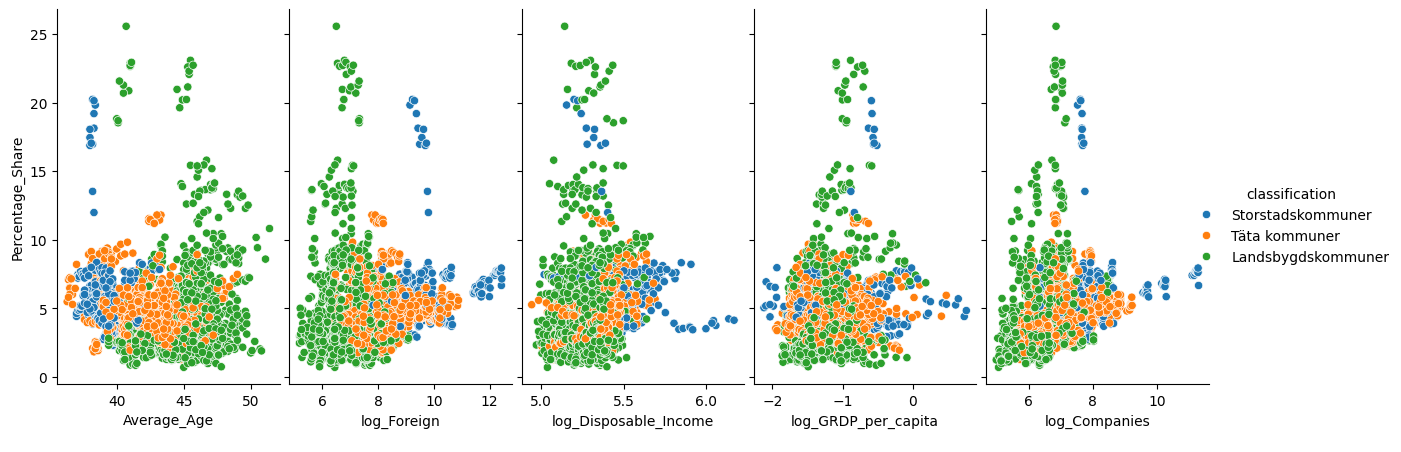

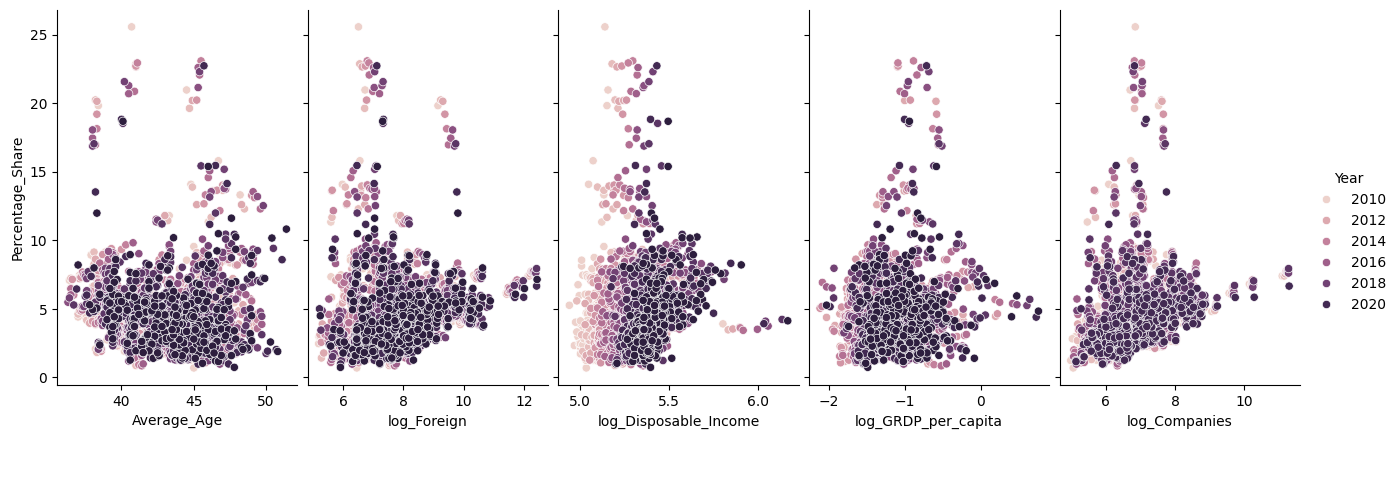

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

vars = ['classification', 'Year']

# Loop through each variable
for column in vars:
    # Create a pairplot
    sns.pairplot(
        df,
        x_vars=['Average_Age', 'log_Foreign', 'log_Disposable_Income', 'log_GRDP_per_capita', 'log_Companies'],
        y_vars=["Percentage_Share"],
        hue=column,
        height=1,  # Height of each facet
        aspect=3 # Aspect ratio of each facet
    )

    # Adjust figure size
    plt.gcf().set_size_inches(14, 10)  # Width and height in inches

    # Show the plot
    plt.show()


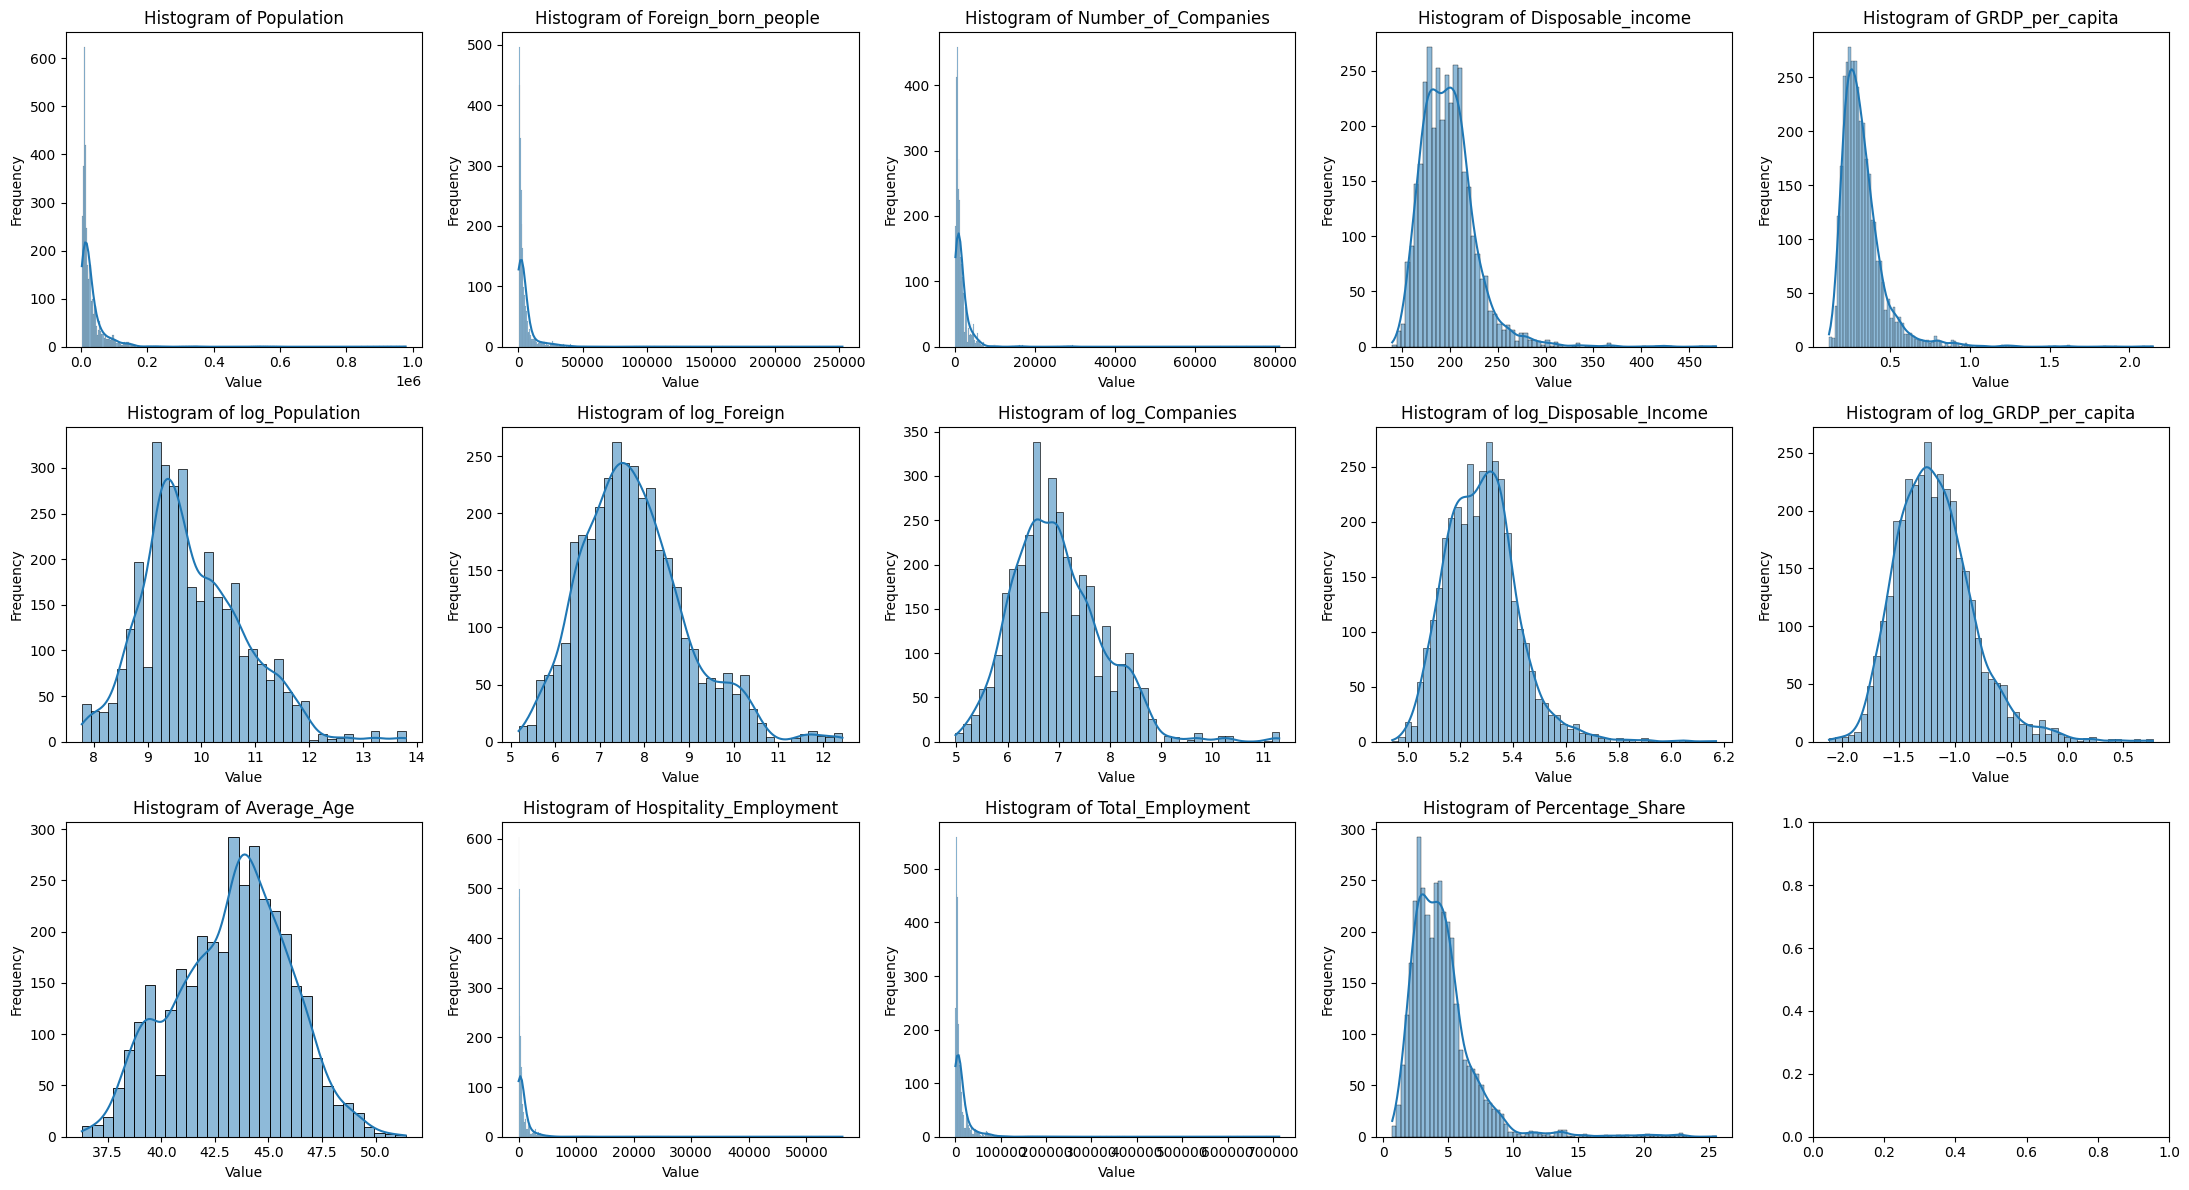

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

variables = ['Population', 'Foreign_born_people ',
            'Number_of_Companies', 'Disposable_income', 'GRDP_per_capita',
                'log_Population', 'log_Foreign',
            'log_Companies', 'log_Disposable_Income', 'log_GRDP_per_capita',
            'Average_Age', 'Hospitality_Employment', 'Total_Employment', 'Percentage_Share',]
# Define the number of rows and columns for subplots
num_rows = 3
num_cols = 5

# Create a figure and axes for subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(22, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through variables and create a histogram for each in a subplot
for i, var in enumerate(variables):
    ax = axes[i]
    sns.histplot(data=df, x=var, kde=True, ax=ax)
    ax.set_title(f'Histogram of {var}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()
from numpy import log as ln


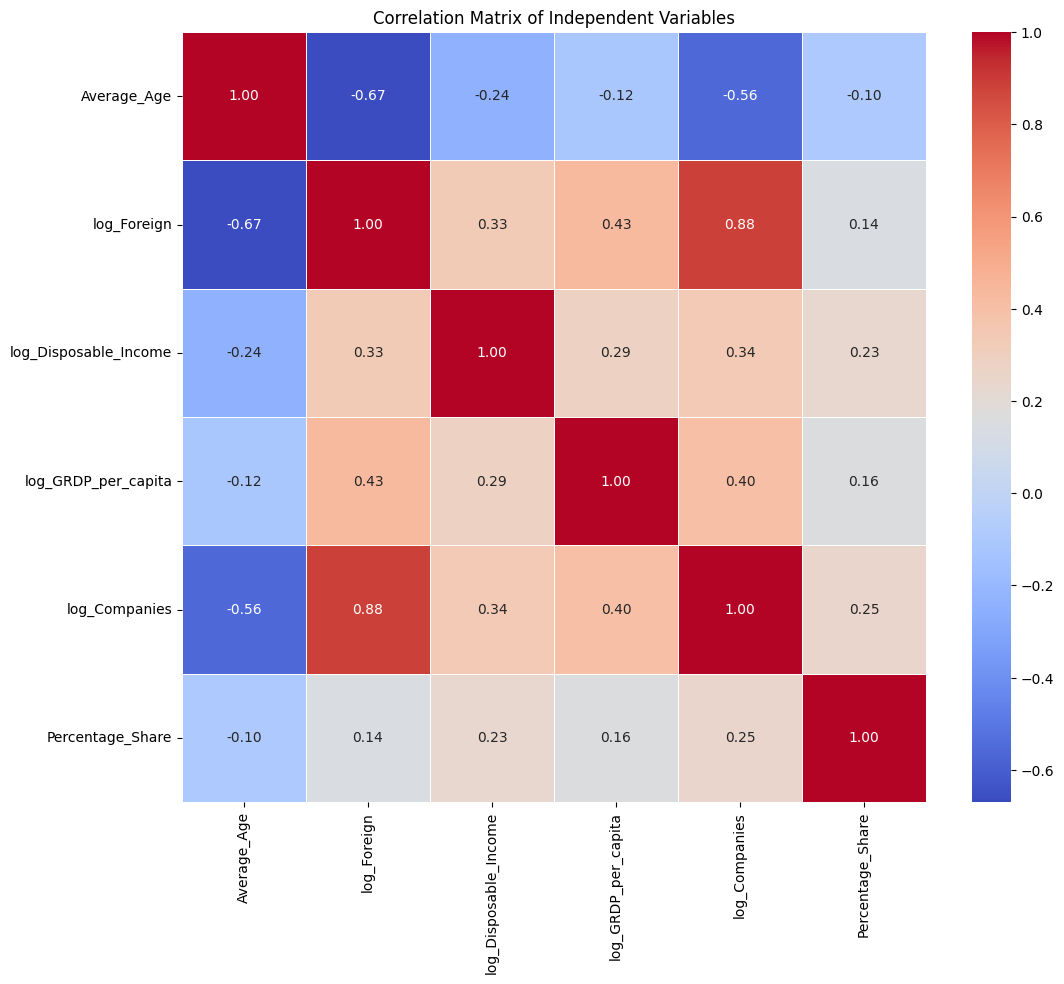

In [ ]:
import seaborn as sns

independent_variables = [
                'Average_Age', 'log_Foreign', 'log_Disposable_Income', 'log_GRDP_per_capita',
              'log_Companies', 'Percentage_Share',]

df_independent = df[independent_variables]

# Calculate the correlation matrix
correlation_matrix = df_independent.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Independent Variables')
plt.show()

In [ ]:
df_new = df.copy()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

df_new.head()

df_new= df_new.drop(columns=['Number_guest_nights'])

X = df_new.drop(columns=['Percentage_Share' ])
y = df_new['Percentage_Share']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



rf_model2 = RandomForestRegressor(random_state=42)
rf_model2.fit(X_train, y_train)

y_pred = rf_model2.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Random Forest RMSE:", rmse)

predictions_df = pd.DataFrame({
    'Municipality': X_test['Municipality_Code'],
    'Year': X_test['Year'],
    'Actual hospitality employment': y_test,
    'Predicted hospitality employment': y_pred
})

predictions_df

In [ ]:
df = pd.get_dummies(df_interpolated, columns=['classification'], prefix='Classification')
df

In [ ]:
dummy_df = pd.get_dummies(df, columns=['Year', 'Municipality_Code'], prefix=['Year', 'Municipality_Code'])

df_with_dummies = pd.concat([df, dummy_df], axis=1)


In [ ]:
df=dummy_df.copy()
df.columns

Index(['Municipality', 'Number_guest_nights', 'Population',
       'Foreign_born_people ', 'Average_Age', 'Number_of_Companies', 'GRDP',
       'Disposable_income', 'Hospitality_Employment', 'Total_Employment',
       ...
       'Municipality_Code_2514 Kalix', 'Municipality_Code_2518 Övertorneå',
       'Municipality_Code_2521 Pajala', 'Municipality_Code_2523 Gällivare',
       'Municipality_Code_2560 Älvsbyn', 'Municipality_Code_2580 Luleå',
       'Municipality_Code_2581 Piteå', 'Municipality_Code_2582 Boden',
       'Municipality_Code_2583 Haparanda', 'Municipality_Code_2584 Kiruna'],
      dtype='object', length=323)

In [ ]:
for column in df.columns:
    print('\''+column+'\'',',')


'Municipality' ,
'Number_guest_nights' ,
'Population' ,
'Foreign_born_people ' ,
'Average_Age' ,
'Number_of_Companies' ,
'GRDP' ,
'Disposable_income' ,
'Hospitality_Employment' ,
'Total_Employment' ,
'Percentage_Share' ,
'Classification_Landsbygdskommuner' ,
'Classification_Storstadskommuner' ,
'Classification_Täta kommuner' ,
'GRDP_per_capita' ,
'log_Population' ,
'log_Foreign' ,
'log_GRDP' ,
'log_Companies' ,
'log_Disposable_Income' ,
'log_GRDP_per_capita' ,
'Year_2010' ,
'Year_2011' ,
'Year_2012' ,
'Year_2013' ,
'Year_2014' ,
'Year_2015' ,
'Year_2016' ,
'Year_2017' ,
'Year_2018' ,
'Year_2019' ,
'Year_2020' ,
'Year_2021' ,
'Municipality_Code_0114 Upplands Väsby' ,
'Municipality_Code_0115 Vallentuna' ,
'Municipality_Code_0117 Österåker' ,
'Municipality_Code_0120 Värmdö' ,
'Municipality_Code_0123 Järfälla' ,
'Municipality_Code_0125 Ekerö' ,
'Municipality_Code_0126 Huddinge' ,
'Municipality_Code_0127 Botkyrka' ,
'Municipality_Code_0128 Salem' ,
'Municipality_Code_0136 Haninge' ,
'Munici

In [ ]:
df

,Municipality,Number_guest_nights,Population,Foreign_born_people,Average_Age,Number_of_Companies,GRDP,Disposable_income,Hospitality_Employment,Total_Employment,Percentage_Share,Classification_Landsbygdskommuner,Classification_Storstadskommuner,Classification_Täta kommuner,GRDP_per_capita,log_Population,log_Foreign,log_GRDP,log_Companies,log_Disposable_Income,log_GRDP_per_capita,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020,Year_2021,Municipality_Code_0114 Upplands Väsby,Municipality_Code_0115 Vallentuna,Municipality_Code_0117 Österåker,Municipality_Code_0120 Värmdö,Municipality_Code_0123 Järfälla,Municipality_Code_0125 Ekerö,Municipality_Code_0126 Huddinge,Municipality_Code_0127 Botkyrka,Municipality_Code_0128 Salem,Municipality_Code_0136 Haninge,Municipality_Code_0138 Tyresö,Municipality_Code_0139 Upplands-Bro,Municipality_Code_0140 Nykvarn,Municipality_Code_0160 Täby,Municipality_Code_0162 Danderyd,Municipality_Code_0163 Sollentuna,Municipality_Code_0180 Stockholm,Municipality_Code_0181 Södertälje,Municipality_Code_0182 Nacka,Municipality_Code_0183 Sundbyberg,Municipality_Code_0184 Solna,Municipality_Code_0186 Lidingö,Municipality_Code_0187 Vaxholm,Municipality_Code_0188 Norrtälje,Municipality_Code_0191 Sigtuna,Municipality_Code_0192 Nynäshamn,Municipality_Code_0305 Håbo,Municipality_Code_0319 Älvkarleby,Municipality_Code_0330 Knivsta,Municipality_Code_0331 Heby,Municipality_Code_0360 Tierp,Municipality_Code_0380 Uppsala,Municipality_Code_0381 Enköping,Municipality_Code_0382 Östhammar,Municipality_Code_0428 Vingåker,Municipality_Code_0461 Gnesta,Municipality_Code_0480 Nyköping,Municipality_Code_0481 Oxelösund,Municipality_Code_0482 Flen,Municipality_Code_0483 Katrineholm,Municipality_Code_0484 Eskilstuna,Municipality_Code_0486 Strängnäs,Municipality_Code_0488 Trosa,Municipality_Code_0509 Ödeshög,Municipality_Code_0512 Ydre,Municipality_Code_0513 Kinda,Municipality_Code_0560 Boxholm,Municipality_Code_0561 Åtvidaberg,Municipality_Code_0562 Finspång,Municipality_Code_0563 Valdemarsvik,Municipality_Code_0580 Linköping,Municipality_Code_0581 Norrköping,Municipality_Code_0582 Söderköping,Municipality_Code_0583 Motala,Municipality_Code_0584 Vadstena,Municipality_Code_0586 Mjölby,Municipality_Code_0604 Aneby,Municipality_Code_0617 Gnosjö,Municipality_Code_0642 Mullsjö,Municipality_Code_0643 Habo,Municipality_Code_0662 Gislaved,Municipality_Code_0665 Vaggeryd,Municipality_Code_0680 Jönköping,Municipality_Code_0682 Nässjö,Municipality_Code_0683 Värnamo,Municipality_Code_0684 Sävsjö,Municipality_Code_0685 Vetlanda,Municipality_Code_0686 Eksjö,Municipality_Code_0687 Tranås,Municipality_Code_0760 Uppvidinge,Municipality_Code_0761 Lessebo,Municipality_Code_0763 Tingsryd,Municipality_Code_0764 Alvesta,Municipality_Code_0765 Älmhult,Municipality_Code_0767 Markaryd,Municipality_Code_0780 Växjö,Municipality_Code_0781 Ljungby,Municipality_Code_0821 Högsby,Municipality_Code_0834 Torsås,Municipality_Code_0840 Mörbylånga,Municipality_Code_0860 Hultsfred,Municipality_Code_0861 Mönsterås,Municipality_Code_0862 Emmaboda,Municipality_Code_0880 Kalmar,Municipality_Code_0881 Nybro,Municipality_Code_0882 Oskarshamn,Municipality_Code_0883 Västervik,Municipality_Code_0884 Vimmerby,Municipality_Code_0885 Borgholm,Municipality_Code_0980 Gotland,Municipality_Code_1060 Olofström,Municipality_Code_1080 Karlskrona,Municipality_Code_1081 Ronneby,Municipality_Code_1082 Karlshamn,Municipality_Code_1083 Sölvesborg,Municipality_Code_1214 Svalöv,Municipality_Code_1230 Staffanstorp,Municipality_Code_1231 Burlöv,Municipality_Code_1233 Vellinge,Municipality_Code_1256 Östra Göinge,Municipality_Code_1257 Örkelljunga,Municipality_Code_1260 Bjuv,Municipality_Code_1261 Kävlinge,Municipality_Code_1262 Lomma,Municipality_Code_1263 Svedala,Municipality_Code_1264 Skurup,Municipality_Code_1265 Sjöbo,Municipality_Code_1266 Hörby,Municipality_Code_1267 Höör,Municipality_Code_1270 Tomelilla,Municipality_Code_1272 Bromöl

In [ ]:
columns_to_convert = [
'Year_2010' ,
'Year_2011' ,
'Year_2012' ,
'Year_2013' ,
'Year_2014' ,
'Year_2015' ,
'Year_2016' ,
'Year_2017' ,
'Year_2018' ,
'Year_2019' ,
'Year_2020' ,
'Year_2021' ,
'Municipality_Code_0114 Upplands Väsby' ,
'Municipality_Code_0115 Vallentuna' ,
'Municipality_Code_0117 Österåker' ,
'Municipality_Code_0120 Värmdö' ,
'Municipality_Code_0123 Järfälla' ,
'Municipality_Code_0125 Ekerö' ,
'Municipality_Code_0126 Huddinge' ,
'Municipality_Code_0127 Botkyrka' ,
'Municipality_Code_0128 Salem' ,
'Municipality_Code_0136 Haninge' ,
'Municipality_Code_0138 Tyresö' ,
'Municipality_Code_0139 Upplands-Bro' ,
'Municipality_Code_0140 Nykvarn' ,
'Municipality_Code_0160 Täby' ,
'Municipality_Code_0162 Danderyd' ,
'Municipality_Code_0163 Sollentuna' ,
'Municipality_Code_0180 Stockholm' ,
'Municipality_Code_0181 Södertälje' ,
'Municipality_Code_0182 Nacka' ,
'Municipality_Code_0183 Sundbyberg' ,
'Municipality_Code_0184 Solna' ,
'Municipality_Code_0186 Lidingö' ,
'Municipality_Code_0187 Vaxholm' ,
'Municipality_Code_0188 Norrtälje' ,
'Municipality_Code_0191 Sigtuna' ,
'Municipality_Code_0192 Nynäshamn' ,
'Municipality_Code_0305 Håbo' ,
'Municipality_Code_0319 Älvkarleby' ,
'Municipality_Code_0330 Knivsta' ,
'Municipality_Code_0331 Heby' ,
'Municipality_Code_0360 Tierp' ,
'Municipality_Code_0380 Uppsala' ,
'Municipality_Code_0381 Enköping' ,
'Municipality_Code_0382 Östhammar' ,
'Municipality_Code_0428 Vingåker' ,
'Municipality_Code_0461 Gnesta' ,
'Municipality_Code_0480 Nyköping' ,
'Municipality_Code_0481 Oxelösund' ,
'Municipality_Code_0482 Flen' ,
'Municipality_Code_0483 Katrineholm' ,
'Municipality_Code_0484 Eskilstuna' ,
'Municipality_Code_0486 Strängnäs' ,
'Municipality_Code_0488 Trosa' ,
'Municipality_Code_0509 Ödeshög' ,
'Municipality_Code_0512 Ydre' ,
'Municipality_Code_0513 Kinda' ,
'Municipality_Code_0560 Boxholm' ,
'Municipality_Code_0561 Åtvidaberg' ,
'Municipality_Code_0562 Finspång' ,
'Municipality_Code_0563 Valdemarsvik' ,
'Municipality_Code_0580 Linköping' ,
'Municipality_Code_0581 Norrköping' ,
'Municipality_Code_0582 Söderköping' ,
'Municipality_Code_0583 Motala' ,
'Municipality_Code_0584 Vadstena' ,
'Municipality_Code_0586 Mjölby' ,
'Municipality_Code_0604 Aneby' ,
'Municipality_Code_0617 Gnosjö' ,
'Municipality_Code_0642 Mullsjö' ,
'Municipality_Code_0643 Habo' ,
'Municipality_Code_0662 Gislaved' ,
'Municipality_Code_0665 Vaggeryd' ,
'Municipality_Code_0680 Jönköping' ,
'Municipality_Code_0682 Nässjö' ,
'Municipality_Code_0683 Värnamo' ,
'Municipality_Code_0684 Sävsjö' ,
'Municipality_Code_0685 Vetlanda' ,
'Municipality_Code_0686 Eksjö' ,
'Municipality_Code_0687 Tranås' ,
'Municipality_Code_0760 Uppvidinge' ,
'Municipality_Code_0761 Lessebo' ,
'Municipality_Code_0763 Tingsryd' ,
'Municipality_Code_0764 Alvesta' ,
'Municipality_Code_0765 Älmhult' ,
'Municipality_Code_0767 Markaryd' ,
'Municipality_Code_0780 Växjö' ,
'Municipality_Code_0781 Ljungby' ,
'Municipality_Code_0821 Högsby' ,
'Municipality_Code_0834 Torsås' ,
'Municipality_Code_0840 Mörbylånga' ,
'Municipality_Code_0860 Hultsfred' ,
'Municipality_Code_0861 Mönsterås' ,
'Municipality_Code_0862 Emmaboda' ,
'Municipality_Code_0880 Kalmar' ,
'Municipality_Code_0881 Nybro' ,
'Municipality_Code_0882 Oskarshamn' ,
'Municipality_Code_0883 Västervik' ,
'Municipality_Code_0884 Vimmerby' ,
'Municipality_Code_0885 Borgholm' ,
'Municipality_Code_0980 Gotland' ,
'Municipality_Code_1060 Olofström' ,
'Municipality_Code_1080 Karlskrona' ,
'Municipality_Code_1081 Ronneby' ,
'Municipality_Code_1082 Karlshamn' ,
'Municipality_Code_1083 Sölvesborg' ,
'Municipality_Code_1214 Svalöv' ,
'Municipality_Code_1230 Staffanstorp' ,
'Municipality_Code_1231 Burlöv' ,
'Municipality_Code_1233 Vellinge' ,
'Municipality_Code_1256 Östra Göinge' ,
'Municipality_Code_1257 Örkelljunga' ,
'Municipality_Code_1260 Bjuv' ,
'Municipality_Code_1261 Kävlinge' ,
'Municipality_Code_1262 Lomma' ,
'Municipality_Code_1263 Svedala' ,
'Municipality_Code_1264 Skurup' ,
'Municipality_Code_1265 Sjöbo' ,
'Municipality_Code_1266 Hörby' ,
'Municipality_Code_1267 Höör' ,
'Municipality_Code_1270 Tomelilla' ,
'Municipality_Code_1272 Bromölla' ,
'Municipality_Code_1273 Osby' ,
'Municipality_Code_1275 Perstorp' ,
'Municipality_Code_1276 Klippan' ,
'Municipality_Code_1277 Åstorp' ,
'Municipality_Code_1278 Båstad' ,
'Municipality_Code_1280 Malmö' ,
'Municipality_Code_1281 Lund' ,
'Municipality_Code_1282 Landskrona' ,
'Municipality_Code_1283 Helsingborg' ,
'Municipality_Code_1284 Höganäs' ,
'Municipality_Code_1285 Eslöv' ,
'Municipality_Code_1286 Ystad' ,
'Municipality_Code_1287 Trelleborg' ,
'Municipality_Code_1290 Kristianstad' ,
'Municipality_Code_1291 Simrishamn' ,
'Municipality_Code_1292 Ängelholm' ,
'Municipality_Code_1293 Hässleholm' ,
'Municipality_Code_1315 Hylte' ,
'Municipality_Code_1380 Halmstad' ,
'Municipality_Code_1381 Laholm' ,
'Municipality_Code_1382 Falkenberg' ,
'Municipality_Code_1383 Varberg' ,
'Municipality_Code_1384 Kungsbacka' ,
'Municipality_Code_1401 Härryda' ,
'Municipality_Code_1402 Partille' ,
'Municipality_Code_1407 Öckerö' ,
'Municipality_Code_1415 Stenungsund' ,
'Municipality_Code_1419 Tjörn' ,
'Municipality_Code_1421 Orust' ,
'Municipality_Code_1427 Sotenäs' ,
'Municipality_Code_1430 Munkedal' ,
'Municipality_Code_1435 Tanum' ,
'Municipality_Code_1438 Dals-Ed' ,
'Municipality_Code_1439 Färgelanda' ,
'Municipality_Code_1440 Ale' ,
'Municipality_Code_1441 Lerum' ,
'Municipality_Code_1442 Vårgårda' ,
'Municipality_Code_1443 Bollebygd' ,
'Municipality_Code_1444 Grästorp' ,
'Municipality_Code_1445 Essunga' ,
'Municipality_Code_1446 Karlsborg' ,
'Municipality_Code_1447 Gullspång' ,
'Municipality_Code_1452 Tranemo' ,
'Municipality_Code_1460 Bengtsfors' ,
'Municipality_Code_1461 Mellerud' ,
'Municipality_Code_1462 Lilla Edet' ,
'Municipality_Code_1463 Mark' ,
'Municipality_Code_1465 Svenljunga' ,
'Municipality_Code_1466 Herrljunga' ,
'Municipality_Code_1470 Vara' ,
'Municipality_Code_1471 Götene' ,
'Municipality_Code_1472 Tibro' ,
'Municipality_Code_1473 Töreboda' ,
'Municipality_Code_1480 Göteborg' ,
'Municipality_Code_1481 Mölndal' ,
'Municipality_Code_1482 Kungälv' ,
'Municipality_Code_1484 Lysekil' ,
'Municipality_Code_1485 Uddevalla' ,
'Municipality_Code_1486 Strömstad' ,
'Municipality_Code_1487 Vänersborg' ,
'Municipality_Code_1488 Trollhättan' ,
'Municipality_Code_1489 Alingsås' ,
'Municipality_Code_1490 Borås' ,
'Municipality_Code_1491 Ulricehamn' ,
'Municipality_Code_1492 Åmål' ,
'Municipality_Code_1493 Mariestad' ,
'Municipality_Code_1494 Lidköping' ,
'Municipality_Code_1495 Skara' ,
'Municipality_Code_1496 Skövde' ,
'Municipality_Code_1497 Hjo' ,
'Municipality_Code_1498 Tidaholm' ,
'Municipality_Code_1499 Falköping' ,
'Municipality_Code_1715 Kil' ,
'Municipality_Code_1730 Eda' ,
'Municipality_Code_1737 Torsby' ,
'Municipality_Code_1760 Storfors' ,
'Municipality_Code_1761 Hammarö' ,
'Municipality_Code_1762 Munkfors' ,
'Municipality_Code_1763 Forshaga' ,
'Municipality_Code_1764 Grums' ,
'Municipality_Code_1765 Årjäng' ,
'Municipality_Code_1766 Sunne' ,
'Municipality_Code_1780 Karlstad' ,
'Municipality_Code_1781 Kristinehamn' ,
'Municipality_Code_1782 Filipstad' ,
'Municipality_Code_1783 Hagfors' ,
'Municipality_Code_1784 Arvika' ,
'Municipality_Code_1785 Säffle' ,
'Municipality_Code_1814 Lekeberg' ,
'Municipality_Code_1860 Laxå' ,
'Municipality_Code_1861 Hallsberg' ,
'Municipality_Code_1862 Degerfors' ,
'Municipality_Code_1863 Hällefors' ,
'Municipality_Code_1864 Ljusnarsberg' ,
'Municipality_Code_1880 Örebro' ,
'Municipality_Code_1881 Kumla' ,
'Municipality_Code_1882 Askersund' ,
'Municipality_Code_1883 Karlskoga' ,
'Municipality_Code_1884 Nora' ,
'Municipality_Code_1885 Lindesberg' ,
'Municipality_Code_1904 Skinnskatteberg' ,
'Municipality_Code_1907 Surahammar' ,
'Municipality_Code_1960 Kungsör' ,
'Municipality_Code_1961 Hallstahammar' ,
'Municipality_Code_1962 Norberg' ,
'Municipality_Code_1980 Västerås' ,
'Municipality_Code_1981 Sala' ,
'Municipality_Code_1982 Fagersta' ,
'Municipality_Code_1983 Köping' ,
'Municipality_Code_1984 Arboga' ,
'Municipality_Code_2021 Vansbro' ,
'Municipality_Code_2023 Malung-Sälen' ,
'Municipality_Code_2026 Gagnef' ,
'Municipality_Code_2029 Leksand' ,
'Municipality_Code_2031 Rättvik' ,
'Municipality_Code_2034 Orsa' ,
'Municipality_Code_2039 Älvdalen' ,
'Municipality_Code_2061 Smedjebacken' ,
'Municipality_Code_2062 Mora' ,
'Municipality_Code_2080 Falun' ,
'Municipality_Code_2081 Borlänge' ,
'Municipality_Code_2082 Säter' ,
'Municipality_Code_2083 Hedemora' ,
'Municipality_Code_2084 Avesta' ,
'Municipality_Code_2085 Ludvika' ,
'Municipality_Code_2101 Ockelbo' ,
'Municipality_Code_2104 Hofors' ,
'Municipality_Code_2121 Ovanåker' ,
'Municipality_Code_2132 Nordanstig' ,
'Municipality_Code_2161 Ljusdal' ,
'Municipality_Code_2180 Gävle' ,
'Municipality_Code_2181 Sandviken' ,
'Municipality_Code_2182 Söderhamn' ,
'Municipality_Code_2183 Bollnäs' ,
'Municipality_Code_2184 Hudiksvall' ,
'Municipality_Code_2260 Ånge' ,
'Municipality_Code_2262 Timrå' ,
'Municipality_Code_2280 Härnösand' ,
'Municipality_Code_2281 Sundsvall' ,
'Municipality_Code_2282 Kramfors' ,
'Municipality_Code_2283 Sollefteå' ,
'Municipality_Code_2284 Örnsköldsvik' ,
'Municipality_Code_2303 Ragunda' ,
'Municipality_Code_2305 Bräcke' ,
'Municipality_Code_2309 Krokom' ,
'Municipality_Code_2313 Strömsund' ,
'Municipality_Code_2321 Åre' ,
'Municipality_Code_2326 Berg' ,
'Municipality_Code_2361 Härjedalen' ,
'Municipality_Code_2380 Östersund' ,
'Municipality_Code_2401 Nordmaling' ,
'Municipality_Code_2403 Bjurholm' ,
'Municipality_Code_2404 Vindeln' ,
'Municipality_Code_2409 Robertsfors' ,
'Municipality_Code_2417 Norsjö' ,
'Municipality_Code_2418 Malå' ,
'Municipality_Code_2421 Storuman' ,
'Municipality_Code_2422 Sorsele' ,
'Municipality_Code_2425 Dorotea' ,
'Municipality_Code_2460 Vännäs' ,
'Municipality_Code_2462 Vilhelmina' ,
'Municipality_Code_2463 Åsele' ,
'Municipality_Code_2480 Umeå' ,
'Municipality_Code_2481 Lycksele' ,
'Municipality_Code_2482 Skellefteå' ,
'Municipality_Code_2505 Arvidsjaur' ,
'Municipality_Code_2506 Arjeplog' ,
'Municipality_Code_2510 Jokkmokk' ,
'Municipality_Code_2513 Överkalix' ,
'Municipality_Code_2514 Kalix' ,
'Municipality_Code_2518 Övertorneå' ,
'Municipality_Code_2521 Pajala' ,
'Municipality_Code_2523 Gällivare' ,
'Municipality_Code_2560 Älvsbyn' ,
'Municipality_Code_2580 Luleå' ,
'Municipality_Code_2581 Piteå' ,
'Municipality_Code_2582 Boden' ,
'Municipality_Code_2583 Haparanda' ,
'Municipality_Code_2584 Kiruna',
'Classification_Landsbygdskommuner',
'Classification_Storstadskommuner',
'Classification_Täta kommuner']

df[columns_to_convert] = df[columns_to_convert].astype(int)

df.head()

,Municipality,Number_guest_nights,Population,Foreign_born_people,Average_Age,Number_of_Companies,GRDP,Disposable_income,Hospitality_Employment,Total_Employment,Percentage_Share,Classification_Landsbygdskommuner,Classification_Storstadskommuner,Classification_Täta kommuner,GRDP_per_capita,log_Population,log_Foreign,log_GRDP,log_Companies,log_Disposable_Income,log_GRDP_per_capita,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020,Year_2021,Municipality_Code_0114 Upplands Väsby,Municipality_Code_0115 Vallentuna,Municipality_Code_0117 Österåker,Municipality_Code_0120 Värmdö,Municipality_Code_0123 Järfälla,Municipality_Code_0125 Ekerö,Municipality_Code_0126 Huddinge,Municipality_Code_0127 Botkyrka,Municipality_Code_0128 Salem,Municipality_Code_0136 Haninge,Municipality_Code_0138 Tyresö,Municipality_Code_0139 Upplands-Bro,Municipality_Code_0140 Nykvarn,Municipality_Code_0160 Täby,Municipality_Code_0162 Danderyd,Municipality_Code_0163 Sollentuna,Municipality_Code_0180 Stockholm,Municipality_Code_0181 Södertälje,Municipality_Code_0182 Nacka,Municipality_Code_0183 Sundbyberg,Municipality_Code_0184 Solna,Municipality_Code_0186 Lidingö,Municipality_Code_0187 Vaxholm,Municipality_Code_0188 Norrtälje,Municipality_Code_0191 Sigtuna,Municipality_Code_0192 Nynäshamn,Municipality_Code_0305 Håbo,Municipality_Code_0319 Älvkarleby,Municipality_Code_0330 Knivsta,Municipality_Code_0331 Heby,Municipality_Code_0360 Tierp,Municipality_Code_0380 Uppsala,Municipality_Code_0381 Enköping,Municipality_Code_0382 Östhammar,Municipality_Code_0428 Vingåker,Municipality_Code_0461 Gnesta,Municipality_Code_0480 Nyköping,Municipality_Code_0481 Oxelösund,Municipality_Code_0482 Flen,Municipality_Code_0483 Katrineholm,Municipality_Code_0484 Eskilstuna,Municipality_Code_0486 Strängnäs,Municipality_Code_0488 Trosa,Municipality_Code_0509 Ödeshög,Municipality_Code_0512 Ydre,Municipality_Code_0513 Kinda,Municipality_Code_0560 Boxholm,Municipality_Code_0561 Åtvidaberg,Municipality_Code_0562 Finspång,Municipality_Code_0563 Valdemarsvik,Municipality_Code_0580 Linköping,Municipality_Code_0581 Norrköping,Municipality_Code_0582 Söderköping,Municipality_Code_0583 Motala,Municipality_Code_0584 Vadstena,Municipality_Code_0586 Mjölby,Municipality_Code_0604 Aneby,Municipality_Code_0617 Gnosjö,Municipality_Code_0642 Mullsjö,Municipality_Code_0643 Habo,Municipality_Code_0662 Gislaved,Municipality_Code_0665 Vaggeryd,Municipality_Code_0680 Jönköping,Municipality_Code_0682 Nässjö,Municipality_Code_0683 Värnamo,Municipality_Code_0684 Sävsjö,Municipality_Code_0685 Vetlanda,Municipality_Code_0686 Eksjö,Municipality_Code_0687 Tranås,Municipality_Code_0760 Uppvidinge,Municipality_Code_0761 Lessebo,Municipality_Code_0763 Tingsryd,Municipality_Code_0764 Alvesta,Municipality_Code_0765 Älmhult,Municipality_Code_0767 Markaryd,Municipality_Code_0780 Växjö,Municipality_Code_0781 Ljungby,Municipality_Code_0821 Högsby,Municipality_Code_0834 Torsås,Municipality_Code_0840 Mörbylånga,Municipality_Code_0860 Hultsfred,Municipality_Code_0861 Mönsterås,Municipality_Code_0862 Emmaboda,Municipality_Code_0880 Kalmar,Municipality_Code_0881 Nybro,Municipality_Code_0882 Oskarshamn,Municipality_Code_0883 Västervik,Municipality_Code_0884 Vimmerby,Municipality_Code_0885 Borgholm,Municipality_Code_0980 Gotland,Municipality_Code_1060 Olofström,Municipality_Code_1080 Karlskrona,Municipality_Code_1081 Ronneby,Municipality_Code_1082 Karlshamn,Municipality_Code_1083 Sölvesborg,Municipality_Code_1214 Svalöv,Municipality_Code_1230 Staffanstorp,Municipality_Code_1231 Burlöv,Municipality_Code_1233 Vellinge,Municipality_Code_1256 Östra Göinge,Municipality_Code_1257 Örkelljunga,Municipality_Code_1260 Bjuv,Municipality_Code_1261 Kävlinge,Municipality_Code_1262 Lomma,Municipality_Code_1263 Svedala,Municipality_Code_1264 Skurup,Municipality_Code_1265 Sjöbo,Municipality_Code_1266 Hörby,Municipality_Code_1267 Höör,Municipality_Code_1270 Tomelilla,Municipality_Code_1272 Bromöl

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

independent_vars = [
'Average_Age' ,
'log_Foreign' ,
'log_Disposable_Income' ,
'log_GRDP_per_capita',
'log_Companies' ,
'Classification_Landsbygdskommuner' ,
'Classification_Storstadskommuner' ,
'Classification_Täta kommuner' ,
'Year_2010' ,
'Year_2011' ,
'Year_2012' ,
'Year_2013' ,
'Year_2014' ,
'Year_2015' ,
'Year_2016' ,
'Year_2017' ,
'Year_2018' ,
'Year_2019' ,
'Year_2020' ,
'Year_2021' ,
'Municipality_Code_0114 Upplands Väsby' ,
'Municipality_Code_0115 Vallentuna' ,
'Municipality_Code_0117 Österåker' ,
'Municipality_Code_0120 Värmdö' ,
'Municipality_Code_0123 Järfälla' ,
'Municipality_Code_0125 Ekerö' ,
'Municipality_Code_0126 Huddinge' ,
'Municipality_Code_0127 Botkyrka' ,
'Municipality_Code_0128 Salem' ,
'Municipality_Code_0136 Haninge' ,
'Municipality_Code_0138 Tyresö' ,
'Municipality_Code_0139 Upplands-Bro' ,
'Municipality_Code_0140 Nykvarn' ,
'Municipality_Code_0160 Täby' ,
'Municipality_Code_0162 Danderyd' ,
'Municipality_Code_0163 Sollentuna' ,
'Municipality_Code_0180 Stockholm' ,
'Municipality_Code_0181 Södertälje' ,
'Municipality_Code_0182 Nacka' ,
'Municipality_Code_0183 Sundbyberg' ,
'Municipality_Code_0184 Solna' ,
'Municipality_Code_0186 Lidingö' ,
'Municipality_Code_0187 Vaxholm' ,
'Municipality_Code_0188 Norrtälje' ,
'Municipality_Code_0191 Sigtuna' ,
'Municipality_Code_0192 Nynäshamn' ,
'Municipality_Code_0305 Håbo' ,
'Municipality_Code_0319 Älvkarleby' ,
'Municipality_Code_0330 Knivsta' ,
'Municipality_Code_0331 Heby' ,
'Municipality_Code_0360 Tierp' ,
'Municipality_Code_0380 Uppsala' ,
'Municipality_Code_0381 Enköping' ,
'Municipality_Code_0382 Östhammar' ,
'Municipality_Code_0428 Vingåker' ,
'Municipality_Code_0461 Gnesta' ,
'Municipality_Code_0480 Nyköping' ,
'Municipality_Code_0481 Oxelösund' ,
'Municipality_Code_0482 Flen' ,
'Municipality_Code_0483 Katrineholm' ,
'Municipality_Code_0484 Eskilstuna' ,
'Municipality_Code_0486 Strängnäs' ,
'Municipality_Code_0488 Trosa' ,
'Municipality_Code_0509 Ödeshög' ,
'Municipality_Code_0512 Ydre' ,
'Municipality_Code_0513 Kinda' ,
'Municipality_Code_0560 Boxholm' ,
'Municipality_Code_0561 Åtvidaberg' ,
'Municipality_Code_0562 Finspång' ,
'Municipality_Code_0563 Valdemarsvik' ,
'Municipality_Code_0580 Linköping' ,
'Municipality_Code_0581 Norrköping' ,
'Municipality_Code_0582 Söderköping' ,
'Municipality_Code_0583 Motala' ,
'Municipality_Code_0584 Vadstena' ,
'Municipality_Code_0586 Mjölby' ,
'Municipality_Code_0604 Aneby' ,
'Municipality_Code_0617 Gnosjö' ,
'Municipality_Code_0642 Mullsjö' ,
'Municipality_Code_0643 Habo' ,
'Municipality_Code_0662 Gislaved' ,
'Municipality_Code_0665 Vaggeryd' ,
'Municipality_Code_0680 Jönköping' ,
'Municipality_Code_0682 Nässjö' ,
'Municipality_Code_0683 Värnamo' ,
'Municipality_Code_0684 Sävsjö' ,
'Municipality_Code_0685 Vetlanda' ,
'Municipality_Code_0686 Eksjö' ,
'Municipality_Code_0687 Tranås' ,
'Municipality_Code_0760 Uppvidinge' ,
'Municipality_Code_0761 Lessebo' ,
'Municipality_Code_0763 Tingsryd' ,
'Municipality_Code_0764 Alvesta' ,
'Municipality_Code_0765 Älmhult' ,
'Municipality_Code_0767 Markaryd' ,
'Municipality_Code_0780 Växjö' ,
'Municipality_Code_0781 Ljungby' ,
'Municipality_Code_0821 Högsby' ,
'Municipality_Code_0834 Torsås' ,
'Municipality_Code_0840 Mörbylånga' ,
'Municipality_Code_0860 Hultsfred' ,
'Municipality_Code_0861 Mönsterås' ,
'Municipality_Code_0862 Emmaboda' ,
'Municipality_Code_0880 Kalmar' ,
'Municipality_Code_0881 Nybro' ,
'Municipality_Code_0882 Oskarshamn' ,
'Municipality_Code_0883 Västervik' ,
'Municipality_Code_0884 Vimmerby' ,
'Municipality_Code_0885 Borgholm' ,
'Municipality_Code_0980 Gotland' ,
'Municipality_Code_1060 Olofström' ,
'Municipality_Code_1080 Karlskrona' ,
'Municipality_Code_1081 Ronneby' ,
'Municipality_Code_1082 Karlshamn' ,
'Municipality_Code_1083 Sölvesborg' ,
'Municipality_Code_1214 Svalöv' ,
'Municipality_Code_1230 Staffanstorp' ,
'Municipality_Code_1231 Burlöv' ,
'Municipality_Code_1233 Vellinge' ,
'Municipality_Code_1256 Östra Göinge' ,
'Municipality_Code_1257 Örkelljunga' ,
'Municipality_Code_1260 Bjuv' ,
'Municipality_Code_1261 Kävlinge' ,
'Municipality_Code_1262 Lomma' ,
'Municipality_Code_1263 Svedala' ,
'Municipality_Code_1264 Skurup' ,
'Municipality_Code_1265 Sjöbo' ,
'Municipality_Code_1266 Hörby' ,
'Municipality_Code_1267 Höör' ,
'Municipality_Code_1270 Tomelilla' ,
'Municipality_Code_1272 Bromölla' ,
'Municipality_Code_1273 Osby' ,
'Municipality_Code_1275 Perstorp' ,
'Municipality_Code_1276 Klippan' ,
'Municipality_Code_1277 Åstorp' ,
'Municipality_Code_1278 Båstad' ,
'Municipality_Code_1280 Malmö' ,
'Municipality_Code_1281 Lund' ,
'Municipality_Code_1282 Landskrona' ,
'Municipality_Code_1283 Helsingborg' ,
'Municipality_Code_1284 Höganäs' ,
'Municipality_Code_1285 Eslöv' ,
'Municipality_Code_1286 Ystad' ,
'Municipality_Code_1287 Trelleborg' ,
'Municipality_Code_1290 Kristianstad' ,
'Municipality_Code_1291 Simrishamn' ,
'Municipality_Code_1292 Ängelholm' ,
'Municipality_Code_1293 Hässleholm' ,
'Municipality_Code_1315 Hylte' ,
'Municipality_Code_1380 Halmstad' ,
'Municipality_Code_1381 Laholm' ,
'Municipality_Code_1382 Falkenberg' ,
'Municipality_Code_1383 Varberg' ,
'Municipality_Code_1384 Kungsbacka' ,
'Municipality_Code_1401 Härryda' ,
'Municipality_Code_1402 Partille' ,
'Municipality_Code_1407 Öckerö' ,
'Municipality_Code_1415 Stenungsund' ,
'Municipality_Code_1419 Tjörn' ,
'Municipality_Code_1421 Orust' ,
'Municipality_Code_1427 Sotenäs' ,
'Municipality_Code_1430 Munkedal' ,
'Municipality_Code_1435 Tanum' ,
'Municipality_Code_1438 Dals-Ed' ,
'Municipality_Code_1439 Färgelanda' ,
'Municipality_Code_1440 Ale' ,
'Municipality_Code_1441 Lerum' ,
'Municipality_Code_1442 Vårgårda' ,
'Municipality_Code_1443 Bollebygd' ,
'Municipality_Code_1444 Grästorp' ,
'Municipality_Code_1445 Essunga' ,
'Municipality_Code_1446 Karlsborg' ,
'Municipality_Code_1447 Gullspång' ,
'Municipality_Code_1452 Tranemo' ,
'Municipality_Code_1460 Bengtsfors' ,
'Municipality_Code_1461 Mellerud' ,
'Municipality_Code_1462 Lilla Edet' ,
'Municipality_Code_1463 Mark' ,
'Municipality_Code_1465 Svenljunga' ,
'Municipality_Code_1466 Herrljunga' ,
'Municipality_Code_1470 Vara' ,
'Municipality_Code_1471 Götene' ,
'Municipality_Code_1472 Tibro' ,
'Municipality_Code_1473 Töreboda' ,
'Municipality_Code_1480 Göteborg' ,
'Municipality_Code_1481 Mölndal' ,
'Municipality_Code_1482 Kungälv' ,
'Municipality_Code_1484 Lysekil' ,
'Municipality_Code_1485 Uddevalla' ,
'Municipality_Code_1486 Strömstad' ,
'Municipality_Code_1487 Vänersborg' ,
'Municipality_Code_1488 Trollhättan' ,
'Municipality_Code_1489 Alingsås' ,
'Municipality_Code_1490 Borås' ,
'Municipality_Code_1491 Ulricehamn' ,
'Municipality_Code_1492 Åmål' ,
'Municipality_Code_1493 Mariestad' ,
'Municipality_Code_1494 Lidköping' ,
'Municipality_Code_1495 Skara' ,
'Municipality_Code_1496 Skövde' ,
'Municipality_Code_1497 Hjo' ,
'Municipality_Code_1498 Tidaholm' ,
'Municipality_Code_1499 Falköping' ,
'Municipality_Code_1715 Kil' ,
'Municipality_Code_1730 Eda' ,
'Municipality_Code_1737 Torsby' ,
'Municipality_Code_1760 Storfors' ,
'Municipality_Code_1761 Hammarö' ,
'Municipality_Code_1762 Munkfors' ,
'Municipality_Code_1763 Forshaga' ,
'Municipality_Code_1764 Grums' ,
'Municipality_Code_1765 Årjäng' ,
'Municipality_Code_1766 Sunne' ,
'Municipality_Code_1780 Karlstad' ,
'Municipality_Code_1781 Kristinehamn' ,
'Municipality_Code_1782 Filipstad' ,
'Municipality_Code_1783 Hagfors' ,
'Municipality_Code_1784 Arvika' ,
'Municipality_Code_1785 Säffle' ,
'Municipality_Code_1814 Lekeberg' ,
'Municipality_Code_1860 Laxå' ,
'Municipality_Code_1861 Hallsberg' ,
'Municipality_Code_1862 Degerfors' ,
'Municipality_Code_1863 Hällefors' ,
'Municipality_Code_1864 Ljusnarsberg' ,
'Municipality_Code_1880 Örebro' ,
'Municipality_Code_1881 Kumla' ,
'Municipality_Code_1882 Askersund' ,
'Municipality_Code_1883 Karlskoga' ,
'Municipality_Code_1884 Nora' ,
'Municipality_Code_1885 Lindesberg' ,
'Municipality_Code_1904 Skinnskatteberg' ,
'Municipality_Code_1907 Surahammar' ,
'Municipality_Code_1960 Kungsör' ,
'Municipality_Code_1961 Hallstahammar' ,
'Municipality_Code_1962 Norberg' ,
'Municipality_Code_1980 Västerås' ,
'Municipality_Code_1981 Sala' ,
'Municipality_Code_1982 Fagersta' ,
'Municipality_Code_1983 Köping' ,
'Municipality_Code_1984 Arboga' ,
'Municipality_Code_2021 Vansbro' ,
'Municipality_Code_2023 Malung-Sälen' ,
'Municipality_Code_2026 Gagnef' ,
'Municipality_Code_2029 Leksand' ,
'Municipality_Code_2031 Rättvik' ,
'Municipality_Code_2034 Orsa' ,
'Municipality_Code_2039 Älvdalen' ,
'Municipality_Code_2061 Smedjebacken' ,
'Municipality_Code_2062 Mora' ,
'Municipality_Code_2080 Falun' ,
'Municipality_Code_2081 Borlänge' ,
'Municipality_Code_2082 Säter' ,
'Municipality_Code_2083 Hedemora' ,
'Municipality_Code_2084 Avesta' ,
'Municipality_Code_2085 Ludvika' ,
'Municipality_Code_2101 Ockelbo' ,
'Municipality_Code_2104 Hofors' ,
'Municipality_Code_2121 Ovanåker' ,
'Municipality_Code_2132 Nordanstig' ,
'Municipality_Code_2161 Ljusdal' ,
'Municipality_Code_2180 Gävle' ,
'Municipality_Code_2181 Sandviken' ,
'Municipality_Code_2182 Söderhamn' ,
'Municipality_Code_2183 Bollnäs' ,
'Municipality_Code_2184 Hudiksvall' ,
'Municipality_Code_2260 Ånge' ,
'Municipality_Code_2262 Timrå' ,
'Municipality_Code_2280 Härnösand' ,
'Municipality_Code_2281 Sundsvall' ,
'Municipality_Code_2282 Kramfors' ,
'Municipality_Code_2283 Sollefteå' ,
'Municipality_Code_2284 Örnsköldsvik' ,
'Municipality_Code_2303 Ragunda' ,
'Municipality_Code_2305 Bräcke' ,
'Municipality_Code_2309 Krokom' ,
'Municipality_Code_2313 Strömsund' ,
'Municipality_Code_2321 Åre' ,
'Municipality_Code_2326 Berg' ,
'Municipality_Code_2361 Härjedalen' ,
'Municipality_Code_2380 Östersund' ,
'Municipality_Code_2401 Nordmaling' ,
'Municipality_Code_2403 Bjurholm' ,
'Municipality_Code_2404 Vindeln' ,
'Municipality_Code_2409 Robertsfors' ,
'Municipality_Code_2417 Norsjö' ,
'Municipality_Code_2418 Malå' ,
'Municipality_Code_2421 Storuman' ,
'Municipality_Code_2422 Sorsele' ,
'Municipality_Code_2425 Dorotea' ,
'Municipality_Code_2460 Vännäs' ,
'Municipality_Code_2462 Vilhelmina' ,
'Municipality_Code_2463 Åsele' ,
'Municipality_Code_2480 Umeå' ,
'Municipality_Code_2481 Lycksele' ,
'Municipality_Code_2482 Skellefteå' ,
'Municipality_Code_2505 Arvidsjaur' ,
'Municipality_Code_2506 Arjeplog' ,
'Municipality_Code_2510 Jokkmokk' ,
'Municipality_Code_2513 Överkalix' ,
'Municipality_Code_2514 Kalix' ,
'Municipality_Code_2518 Övertorneå' ,
'Municipality_Code_2521 Pajala' ,
'Municipality_Code_2523 Gällivare' ,
'Municipality_Code_2560 Älvsbyn' ,
'Municipality_Code_2580 Luleå' ,
'Municipality_Code_2581 Piteå' ,
'Municipality_Code_2582 Boden' ,
'Municipality_Code_2583 Haparanda' ,
'Municipality_Code_2584 Kiruna']

df['const'] = 1

df['Percentage_Share'] = pd.to_numeric(df['Percentage_Share'])


dependent_var = df['Percentage_Share']

model = sm.OLS(dependent_var, df[independent_vars + ['const']])

fixed_effects_results = model.fit()

print(fixed_effects_results.summary())

                            OLS Regression Results                            
Dep. Variable:       Percentage_Share   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     208.5
Date:                Wed, 22 May 2024   Prob (F-statistic):               0.00
Time:                        00:23:14   Log-Likelihood:                -2933.0
No. Observations:                3480   AIC:                             6478.
Df Residuals:                    3174   BIC:                             8361.
Df Model:                         305                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------